In [17]:
from pandas import Series, DataFrame
import pandas as pd

import nltk

%matplotlib inline

In [18]:
from nltk.corpus import gutenberg

In [19]:
gutenberg

<PlaintextCorpusReader in 'C:\\Users\\student\\AppData\\Roaming\\nltk_data\\corpora\\gutenberg'>

In [20]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [21]:
raw_text = gutenberg.raw('austen-emma.txt')

In [22]:
raw_text[:100]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a'

In [23]:
tokens = gutenberg.words('austen-emma.txt')

In [24]:
tokens[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

In [30]:
import re

In [35]:
re.split('\W+', raw_text)[:10]

['', 'Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I']

In [33]:
word_tokens = nltk.tokenize.word_tokenize(raw_text)

In [34]:
word_tokens[:10]

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER']

In [36]:
sent_tokens = nltk.tokenize.sent_tokenize(raw_text)

In [37]:
sent_tokens[:10]

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

In [40]:
def 어휘통계산출(raw_text):
    word_tokens = nltk.tokenize.word_tokenize(raw_text)
    sent_toknes = nltk.tokenize.sent_tokenize(raw_text)
    어휘_토큰 = Series(t for t in word_tokens).str.lower().drop_duplicates()
    글자수 = len(raw_text)
    단어수 = len(word_tokens)
    문장수 = len(sent_toknes)
    어휘수 = len(어휘_토큰)
    return Series({'글자': 글자수, '단어': 단어수, '문장': 문장수, '어휘': 어휘수})

In [41]:
어휘통계산출(raw_text)

글자    887071
단어    191673
문장      7493
어휘      8000
dtype: int64

In [46]:
집계결과 = []
for fid in gutenberg.fileids():
    통계 = 어휘통계산출(gutenberg.raw(fid))
    통계.name = fid
    집계결과.append(통계)

In [48]:
말뭉치_통계 = pd.concat(집계결과, axis=1).T

In [49]:
말뭉치_통계.sort_values(by='어휘', ascending=False)

,글자,단어,문장,어휘
melville-moby_dick.txt,1242990,254989,9852,18717
bible-kjv.txt,4332554,946812,29812,17188
whitman-leaves.txt,711215,149198,3827,13739
milton-paradise.txt,468220,95709,1835,9282
edgeworth-parents.txt,935158,209090,10096,8818
chesterton-ball.txt,457450,97203,4624,8485
chesterton-brown.txt,406629,85412,3712,8058
austen-emma.txt,887071,191673,7493,8000
austen-sense.txt,673022,141367,4833,6681
chesterton-thursday.txt,320525,69408,3588,6491


In [50]:
어휘다양성 = 말뭉치_통계['단어'] / 말뭉치_통계['어휘']

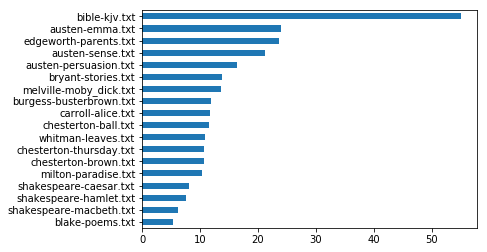

In [52]:
어휘다양성.sort_values().plot(kind='barh')

In [53]:
from nltk.corpus import nps_chat

In [54]:
nps_chat

<NPSChatCorpusReader in 'C:\\Users\\student\\AppData\\Roaming\\nltk_data\\corpora\\nps_chat'>

In [57]:
tokens = nps_chat.posts('10-19-30s_705posts.xml')

In [58]:
tokens

[['U11', 'lol'], ['lol', 'U11'], ['wb', 'U9'], ...]

In [59]:
from nltk.corpus import brown

In [60]:
brown

<CategorizedTaggedCorpusReader in 'C:\\Users\\student\\AppData\\Roaming\\nltk_data\\corpora\\brown'>

In [61]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [62]:
news_tokens = brown.words(categories = 'news')

In [63]:
news_tokens

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [66]:
관심단어 = ['can', 'could', 'may', 'might', 'must', 'will']
Series(t for t in news_tokens).str.lower().value_counts()[관심단어]

can       94
could     87
may       93
might     38
must      53
will     389
dtype: int64

#### 연습

brown 말뭉치의 모든 카테고리에 대해 관심 토큰의 도수를 집계해 비교해 봅시다

In [71]:
집계 = []
for 분류 in brown.categories():
    tokens = brown.words(categories = 분류)
    토큰도수 = Series(t for t in tokens).str.lower().value_counts()
    토큰도수.name = 분류
    집계.append(토큰도수[관심단어])

In [72]:
분류별_통계 = pd.concat(집계, axis=1).T

In [75]:
분류별_비율 = 분류별_통계.div(분류별_통계.sum(1), axis=0)

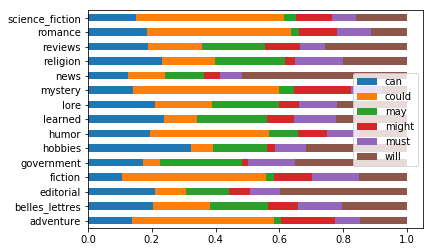

In [76]:
분류별_비율.plot(kind='barh', stacked=True)

#### 또다른 말뭉치

In [77]:
from nltk.corpus import udhr as 인권선언

In [78]:
인권선언

<UdhrCorpusReader in 'C:\\Users\\student\\AppData\\Roaming\\nltk_data\\corpora\\udhr'>

In [79]:
인권선언.fileids()[140:150]

['Kazakh-UTF8',
 'Kiche_Quiche-Latin1',
 'Kicongo-Latin1',
 'Kimbundu_Mbundu-Latin1',
 'Kinyamwezi_Nyamwezi-Latin1',
 'Kinyarwanda-Latin1',
 'Kituba-Latin1',
 'Korean_Hankuko-UTF8',
 'Kpelewo-UTF8',
 'Krio-UTF8']

In [80]:
이름 = '다니엘'

In [84]:
유니코드_포인트 = [ord(글자) for 글자 in 이름]
유니코드_포인트

[45796, 45768, 50648]

In [85]:
유니코드_포인트_hex = [hex(cp) for cp in 유니코드_포인트]
유니코드_포인트_hex   

['0xb2e4', '0xb2c8', '0xc5d8']

In [86]:
이름.encode('utf-8')

b'\xeb\x8b\xa4\xeb\x8b\x88\xec\x97\x98'

In [81]:
이름.encode('utf-16')

b'\xff\xfe\xe4\xb2\xc8\xb2\xd8\xc5'

In [82]:
이름.encode('cp949')

b'\xb4\xd9\xb4\xcf\xbf\xa4'

In [87]:
try:
    이름.encode('ascii')
except UnicodeEncodeError:
    print('인코딩 불가')

인코딩 불가


In [88]:
한국어 = 인권선언.raw('Korean_Hankuko-UTF8')

In [89]:
한국어[:1000]

'세 계 인 권 선 언\n\n전 문 \n\n모든 인류 구성원의 천부의 존엄성과 동등하고 양도할 수 없는 권리를 인정하는 것이 세계의 자유 , 정의 및 평화의 기초이며 , \n\n인권에 대한 무시와 경멸이 인류의 양심을 격분시키는 만행을 초래하였으며 , 인간이 언론과 신앙의 자유, 그리고 공포와 결핍으로부터의 자유를 누릴 수 있는 세계의 도래가 모든 사람들의 지고한 열망으로서 천명되어 왔으며 , \n\n인간이 폭정과 억압에 대항하는 마지막 수단으로서 반란을 일으키도록 강요받지 않으려면 , 법에 의한 통치에 의하여 인권이 보호되어야 하는 것이 필수적이며 , \n\n국가간에 우호관계의 발전을 증진하는 것이 필수적이며 , \n\n국제연합의 모든 사람들은 그 헌장에서 기본적 인권, 인간의 존엄과 가치 , 그리고 남녀의 동등한 권리에 대한 신념을 재확인하였으며, 보다 폭넓은 자유속에서 사회적 진보와 보다 나은 생활수준을 증진하기로 다짐하였고, \n\n회원국들은 국제연합과 협력하여 인권과 기본적 자유의 보편적 존중과 준수를 증진할 것을 스스로 서약하였으며 , \n\n이러한 권리와 자유에 대한 공통의 이해가 이 서약의 완전한 이행을 위하여 가장 중요하므로 , \n\n이에, \n\n국제연합총회는, \n\n모든 개인과 사회 각 기관이 이 선언을 항상 유념하면서 학습 및 교육을 통하여 이러한 권리와 자유에 대한 존중을 증진하기 위하여 노력하며 , 국내적 그리고 국제적인 점진적 조치를 통하여 회원국 국민들 자신과 그 관할 영토의 국민들 사이에서 이러한 권리와 자유가 보편적이고 효과적으로 인식되고 준수되도록 노력하도록 하기 위하여 , 모든 사람과 국가가 성취하여야 할 공통의 기준으로서 이 세계인권선언을 선포한다. \n\n제 1 조 \n\n모든 인간은 태어날 때부터 자유로우며 그 존엄과 권리에 있어 동등하다. 인간은 천부적으로 이성과 양심을 부여받았으며 서로 형제애의 정신으로 행동하여야 한다. \n\n제 2 조 \n\n모든 사람은 인종, 피부색, 성, 언어, 종교, 정치적 또는 기타의

In [91]:
대상텍스트목록 = [
    'Korean_Hankuko-UTF8',
    'English-Latin1',
    'Chinese_Mandarin-GB2312',
    'Japanese_Nihongo-UTF8'
]

In [92]:
토큰길이 = {}
for fid in 대상텍스트목록:
    tokens = 인권선언.words(fid)
    토큰길이[fid] = len(tokens)

In [95]:
인권선언.words(대상텍스트목록[0])

['세', '계', '인', '권', '선', '언', '전', '문', '모든', '인류', ...]

In [94]:
Series(토큰길이).sort_values()

Japanese_Nihongo-UTF8       508
Korean_Hankuko-UTF8        1142
English-Latin1             1781
Chinese_Mandarin-GB2312    2884
dtype: int64

In [97]:
from nltk.corpus.reader.bnc import BNCCorpusReader

In [102]:
bnc_reader = BNCCorpusReader(
    root = 'data/BNC/2554/download/Texts/',
    fileids = r'[A-Z]/\w+/\w+\.xml'
)

In [103]:
bnc_reader.fileids()[:100]

['A/A0/A00.xml',
 'A/A0/A01.xml',
 'A/A0/A02.xml',
 'A/A0/A03.xml',
 'A/A0/A04.xml',
 'A/A0/A05.xml',
 'A/A0/A06.xml',
 'A/A0/A07.xml',
 'A/A0/A08.xml',
 'A/A0/A0A.xml',
 'A/A0/A0B.xml',
 'A/A0/A0C.xml',
 'A/A0/A0D.xml',
 'A/A0/A0E.xml',
 'A/A0/A0F.xml',
 'A/A0/A0G.xml',
 'A/A0/A0H.xml',
 'A/A0/A0J.xml',
 'A/A0/A0K.xml',
 'A/A0/A0L.xml',
 'A/A0/A0M.xml',
 'A/A0/A0N.xml',
 'A/A0/A0P.xml',
 'A/A0/A0R.xml',
 'A/A0/A0S.xml',
 'A/A0/A0T.xml',
 'A/A0/A0U.xml',
 'A/A0/A0V.xml',
 'A/A0/A0W.xml',
 'A/A0/A0X.xml',
 'A/A0/A0Y.xml',
 'A/A1/A10.xml',
 'A/A1/A11.xml',
 'A/A1/A12.xml',
 'A/A1/A13.xml',
 'A/A1/A14.xml',
 'A/A1/A15.xml',
 'A/A1/A16.xml',
 'A/A1/A17.xml',
 'A/A1/A18.xml',
 'A/A1/A19.xml',
 'A/A1/A1A.xml',
 'A/A1/A1B.xml',
 'A/A1/A1D.xml',
 'A/A1/A1E.xml',
 'A/A1/A1F.xml',
 'A/A1/A1G.xml',
 'A/A1/A1H.xml',
 'A/A1/A1J.xml',
 'A/A1/A1K.xml',
 'A/A1/A1L.xml',
 'A/A1/A1M.xml',
 'A/A1/A1N.xml',
 'A/A1/A1P.xml',
 'A/A1/A1R.xml',
 'A/A1/A1S.xml',
 'A/A1/A1T.xml',
 'A/A1/A1U.xml',
 'A/A1/A1V.xml

In [104]:
bnc_reader.words('A/A0/A00.xml')

['FACTSHEET', 'WHAT', 'IS', 'AIDS', '?', 'AIDS', '(', ...]

In [106]:
bnc_reader.words('A/A0/A00.xml')[5:]

['AIDS', '(', 'Acquired', 'Immune', 'Deficiency', ...]

In [105]:
bnc_reader.words('A/A0/A00.xml', stem=True)[5:]

['aids', '(', 'acquire', 'immune', 'deficiency', ...]

In [107]:
bnc_reader.tagged_words('A/A0/A00.xml')

[('FACTSHEET', 'SUBST'), ('WHAT', 'PRON'), ...]

In [108]:
bnc_text = nltk.Text(bnc_reader.words('A/A0/A00.xml'))

In [109]:
bnc_text.similar('AIDS')

hiv patients people global acet time unconditional only praise ironing
thursday


In [111]:
bnc_text.collocations()

Home Care; 840 7879; 081 840; South East; Health Authority; Maurice
Adams; Sue Lore; home care; Anthony Kasozi; equipment loans;
International Adviser; General Manager; Peter Johnson; HIV positive;
Patrick Dixon; people ill; financial support; Jackie Sears; John
Creedy; Jonathan Mann


#### sejong 텍스트 분석

In [112]:
import pyko

In [116]:
sejong_reader = pyko.reader.SejongCorpusReader(
    root = 'data/sejong',
    fileids = 'spoken/word_tag/.+\.txt',
    encoding='utf-16'
)

In [117]:
sejong_reader.fileids()[:10]

['spoken/word_tag/5CT_0013.txt',
 'spoken/word_tag/5CT_0014.txt',
 'spoken/word_tag/5CT_0015.txt',
 'spoken/word_tag/5CT_0016.txt',
 'spoken/word_tag/5CT_0017.txt',
 'spoken/word_tag/5CT_0018.txt',
 'spoken/word_tag/5CT_0019.txt',
 'spoken/word_tag/5CT_0020.txt',
 'spoken/word_tag/5CT_0021.txt',
 'spoken/word_tag/5CT_0022.txt']

In [121]:
tokens = sejong_reader.words(tagged=False)

In [122]:
tagged_tokens = sejong_reader.words(tagged=True)

In [124]:
tokens[10:20]

['아침에', '한', '일찍', '가면은', '일곱시', '이십분', '십오분', '십오분', '차를', '타고,']

In [125]:
tagged_tokens[0][0]

('뭐', (('뭐', 'NP'),))

In [126]:
tagged_tokens[10:20]

[('아침에', (('아침', 'NNG'), ('에', 'JKB'))),
 ('한', (('한', 'MM'),)),
 ('일찍', (('일찍', 'MAG'),)),
 ('가면은', (('가', 'VV'), ('면은', 'EC'))),
 ('일곱시', (('일곱', 'NR'), ('시', 'NNB'))),
 ('이십분', (('이', 'NR'), ('십', 'NR'), ('분', 'NNB'))),
 ('십오분', (('십', 'NR'), ('오', 'NR'), ('분', 'NNB'))),
 ('십오분', (('십', 'NR'), ('오', 'NR'), ('분', 'NNB'))),
 ('차를', (('차', 'NNG'), ('를', 'JKO'))),
 ('타고,', (('타', 'VV'), ('고', 'EC'), (',', 'SP')))]

In [127]:
경로 = 'data/sejong/spoken/raw/4CM00003.txt'

In [128]:
from bs4 import BeautifulSoup

In [131]:
with open(경로, encoding='utf-16') as file:
    soup = BeautifulSoup(file, 'xml')

In [132]:
raw_text = soup.find('text').text

In [133]:
raw_text[:100]

'\n뭘 좀 올려야지.\n뭘 좀 올렸어.\n다시 돌려 앞으로.\n됐어.\n\n우리가족은 아빠 엄마 오빠 나.\n목소리 왜 이케 작어.\n이렇게 네 명인데,\n원래 할아버지두 같이 살었는데,\n할아버지'

In [134]:
with open('sejong_4CM00003.txt', 'w', encoding='utf-8') as file:
    file.write(raw_text)

In [135]:
from nltk.corpus import PlaintextCorpusReader

In [136]:
reader = PlaintextCorpusReader(
    root = '.',
    fileids = 'sejong_4CM00003.txt'
)

In [137]:
reader.fileids()

['sejong_4CM00003.txt']

In [138]:
reader.words()

['뭘', '좀', '올려야지', '.', '뭘', '좀', '올렸어', '.', '다시', ...]

In [139]:
처리기 = pyko.OpenKoreanTextProcessor()

In [141]:
처리기.tokenize('한국어를 처리합니다ㅋㅋㅋ')

['한국어', '를', '처리', '합니다', 'ㅋㅋㅋ']

In [143]:
reader = PlaintextCorpusReader(
    root = '.',
    fileids = 'sejong_4CM00003.txt',
    word_tokenizer = 처리기
)

In [144]:
reader.words()[20:30]

['\r\n', '우리', '가족', '은', '아빠', '엄마', '오빠', '나', '.', '\r\n']

# 어휘 자원

lexical resources

In [145]:
from nltk.corpus import words as 영어사전

In [146]:
영어사전.words()[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

In [147]:
tokens = gutenberg.words('austen-emma.txt')

In [148]:
tokens

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [149]:
'emma' in 영어사전.words()

True

In [150]:
'jpype' in 영어사전.words()

False

In [151]:
def 사전수록여부확인(token):
    return token in 영어사전.words()

In [152]:
단어들 = Series(t for t in tokens).str.lower()

In [156]:
고유단어들 = 단어들.drop_duplicates()

In [159]:
수록여부 = 고유단어들.isin(영어사전.words())

In [164]:
알파벳문자여부 = 고유단어들.str.isalpha()

In [165]:
고유단어들[~수록여부 & 알파벳문자여부]

4                austen
29               seemed
36            blessings
47                years
63             youngest
67            daughters
102                died
117            caresses
124            supplied
147              taylor
150                  mr
166                fond
184             sisters
191              ceased
207             allowed
222              passed
244               liked
247           esteeming
263               evils
276              having
299       disadvantages
301          threatened
306          enjoyments
325               means
328         misfortunes
462              weston
491             denying
500            promoted
531            recalled
553              played
              ...      
187196         chambers
187211           astley
187950            shows
187956           drills
188330        brightest
188766          lessons
188793      resolutions
188942           gayest
188973        conniving
189048          figures
190099          

In [166]:
from nltk.corpus import stopwords

In [167]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [168]:
en_stopwords = stopwords.words('english')

In [169]:
en_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [171]:
단어들[단어들.str.isalpha() & ~단어들.isin(en_stopwords)].value_counts()

mr                1153
emma               865
could              837
would              820
mrs                699
miss               599
must               567
harriet            506
much               486
said               484
one                452
weston             440
every              435
well               401
thing              398
knightley          389
elton              385
think              383
little             359
good               358
never              358
know               337
might              326
woodhouse          313
say                310
jane               301
quite              282
time               279
great              264
nothing            256
                  ... 
cherishing           1
arrow                1
confirm              1
bench                1
lamentations         1
softly               1
unsentimental        1
red                  1
fluctuations         1
preserves            1
coldly               1
coach                1
inferioriti

In [172]:
from nltk.corpus import names

In [173]:
names.fileids()

['female.txt', 'male.txt']

In [178]:
male_names = names.words('male.txt')

In [182]:
female_names = Series(t for t in female_names)

In [183]:
female_names[female_names.isin(male_names)]

3           Abbey
5           Abbie
6            Abby
16          Addie
40         Adrian
45         Adrien
87           Ajay
111          Alex
119        Alexis
120         Alfie
122           Ali
138          Alix
146         Allie
154         Allyn
228         Andie
230        Andrea
239          Andy
246         Angel
257         Angie
357         Ariel
383        Ashley
400        Aubrey
415     Augustine
429        Austin
434        Averil
465        Barrie
466         Barry
475          Beau
506        Bennie
507         Benny
          ...    
4705        Timmy
4714         Tobe
4717        Tobie
4718         Toby
4727       Tommie
4728        Tommy
4732         Tony
4735        Torey
4742        Trace
4744       Tracey
4746       Tracie
4747        Tracy
4788          Val
4791         Vale
4798    Valentine
4811          Van
4855          Vin
4859       Vinnie
4860        Vinny
4867       Virgie
4893       Wallie
4894       Wallis
4895        Wally
4908      Whitney
4918      